In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression

In [4]:
X = np.random.normal(size=(100, 10))
eps = np.random.normal(size=(100, 1))
beta = np.array([2, 1, 1, 0, 3, 5, 2, 0, 10, 1]).reshape(10,1)
y = X.dot(beta) + 1*eps

In [13]:
df = pd.DataFrame(np.column_stack((X,y)))
df.columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','y']

In [16]:
df.to_csv('lm_10.csv', index=0)

## Hyperplane

In [34]:
X2 = np.random.normal(size=(100, 2))
beta = np.array([2, 1]).reshape(2,1)
eps = np.random.normal(size=(100, 1))*0.5
y2 = (X2.dot(beta)+2*eps > 0.5)*1

In [36]:
df = pd.DataFrame(np.column_stack((X2,y2)))
df.columns=['X1','X2','y']
df.to_csv('hyperplane_2.csv', index=0)

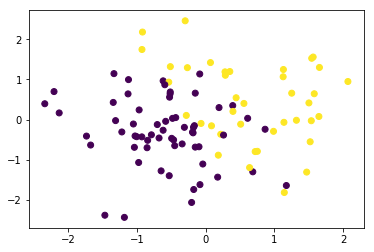

In [37]:
plt.scatter(X2[:,0], X2[:,1], c=y2[:,0])

## MINST

In [17]:
x_014 = pd.read_csv('x_014_tr.csv', index_col = 0)
y_014 = pd.read_csv('y_014_tr.csv', index_col = 0)

In [20]:
df = pd.DataFrame(np.column_stack((x_014,y_014)))
data_14 = df[(df.iloc[:,256] == 1.0) | (df.iloc[:,256] == 4.0) ]
data_14 = pd.DataFrame(np.column_stack((data_14, data_14[256].map({4.0: 1, 1.0: -1}))))
data_14.to_csv('digits_14.csv',index=0)

In [183]:
x_014 = pd.read_csv('x_014_tr.csv', index_col = 0)
y_014 = pd.read_csv('y_014_tr.csv', index_col = 0)

df = pd.DataFrame(np.column_stack((x_014,y_014)))
data_04 = df[(df.iloc[:,256] == 0.0) | (df.iloc[:,256] == 4.0) ]
data_04.loc[data_04.loc[:,256] == 0.0]
data_04 = pd.DataFrame(np.column_stack((data_04, data_04[256].map({4.0: 1, 0.0: -1}))))
data_04 = data_04.iloc[1:100]
data_04.to_csv('digit_04.csv')

In [47]:
import gzip
import numpy as np

from tensorflow.contrib.learn.python.learn.datasets import base

def _read32(bytestream):
    dt = np.dtype(np.uint32).newbyteorder('>')
    return np.frombuffer(bytestream.read(4), dtype=dt)[0]


def extract_images(f):
    """Extract the images into a 4D uint8 np array [index, y, x, depth].
    Args:
    f: A file object that can be passed into a gzip reader.
    Returns:
    data: A 4D unit8 np array [index, y, x, depth].
    Raises:
    ValueError: If the bytestream does not start with 2051.
    """
    print('Extracting', f.name)
    with gzip.GzipFile(fileobj=f) as bytestream:
        magic = _read32(bytestream)
        if magic != 2051:
          raise ValueError('Invalid magic number %d in MNIST image file: %s' %
                           (magic, f.name))
        num_images = _read32(bytestream)
        rows = _read32(bytestream)
        cols = _read32(bytestream)
        buf = bytestream.read(rows * cols * num_images)
        data = np.frombuffer(buf, dtype=np.uint8)
        data = data.reshape(num_images, rows, cols, 1)
        return data


def extract_labels(f, one_hot=False, num_classes=10):
    """Extract the labels into a 1D uint8 np array [index].
    Args:
    f: A file object that can be passed into a gzip reader.
    one_hot: Does one hot encoding for the result.
    num_classes: Number of classes for the one hot encoding.
    Returns:
    labels: a 1D unit8 np array.
    Raises:
    ValueError: If the bystream doesn't start with 2049.
    """
    print('Extracting', f.name)
    with gzip.GzipFile(fileobj=f) as bytestream:
        magic = _read32(bytestream)
        if magic != 2049:
          raise ValueError('Invalid magic number %d in MNIST label file: %s' %
                           (magic, f.name))
        num_items = _read32(bytestream)
        buf = bytestream.read(num_items)
        labels = np.frombuffer(buf, dtype=np.uint8)
        if one_hot:
          return dense_to_one_hot(labels, num_classes)
        return labels


def load_mnist(train_dir, validation_size=5000):

    SOURCE_URL = 'http://yann.lecun.com/exdb/mnist/'

    TRAIN_IMAGES = 'train-images-idx3-ubyte.gz'
    TRAIN_LABELS = 'train-labels-idx1-ubyte.gz'
    TEST_IMAGES = 't10k-images-idx3-ubyte.gz'
    TEST_LABELS = 't10k-labels-idx1-ubyte.gz'

    local_file = base.maybe_download(TRAIN_IMAGES, train_dir,
                                   SOURCE_URL + TRAIN_IMAGES)
    with open(local_file, 'rb') as f:
        train_images = extract_images(f)

    local_file = base.maybe_download(TRAIN_LABELS, train_dir,
                                   SOURCE_URL + TRAIN_LABELS)
    with open(local_file, 'rb') as f:
        train_labels = extract_labels(f)

    local_file = base.maybe_download(TEST_IMAGES, train_dir,
                                   SOURCE_URL + TEST_IMAGES)
    with open(local_file, 'rb') as f:
        test_images = extract_images(f)

    local_file = base.maybe_download(TEST_LABELS, train_dir,
                                   SOURCE_URL + TEST_LABELS)
    with open(local_file, 'rb') as f:
        test_labels = extract_labels(f)

    if not 0 <= validation_size <= len(train_images):
        raise ValueError(
            'Validation size should be between 0 and {}. Received: {}.'
            .format(len(train_images), validation_size))

    validation_images = train_images[:validation_size]
    validation_labels = train_labels[:validation_size]
    train_images = train_images[validation_size:]
    train_labels = train_labels[validation_size:]

    train_images = train_images.astype(np.float32) / 255
    validation_images = validation_images.astype(np.float32) / 255
    test_images = test_images.astype(np.float32) / 255

    return [train_images, train_labels, validation_images, validation_labels]


In [103]:
[train_images, train_labels, validation_images, validation_labels] = load_mnist('C:/Users/ReasonLiu/Desktop/CMU/Statistical and Machine Learning II/Project/46927-Project/data/1_7')

Extracting C:/Users/ReasonLiu/Desktop/CMU/Statistical and Machine Learning II/Project/46927-Project/data/1_7\train-images-idx3-ubyte.gz
Extracting C:/Users/ReasonLiu/Desktop/CMU/Statistical and Machine Learning II/Project/46927-Project/data/1_7\train-labels-idx1-ubyte.gz
Extracting C:/Users/ReasonLiu/Desktop/CMU/Statistical and Machine Learning II/Project/46927-Project/data/1_7\t10k-images-idx3-ubyte.gz
Extracting C:/Users/ReasonLiu/Desktop/CMU/Statistical and Machine Learning II/Project/46927-Project/data/1_7\t10k-labels-idx1-ubyte.gz
